#Practica 4.2:
# Simular el número de llegadas de clientes a un cajero automático durante una hora

##Contexto del problema:

Imaginemos que modelamos la cantidad de clientes que llegan a un cajero automático en una hora. Observaciones previas indican un promedio de 5 clientes por hora. Queremos generar variables aleatorias representando estas llegadas usando la distribución de Poisson y el método de la transformada inversa.

##Distribución Poisson:

La distribución de Poisson modela eventos (llegadas de clientes) que ocurren en un tiempo fijo, con una tasa constante e independiente. La tasa (
𝜆
) es 5 clientes por hora.

##Método de la Transformada Inversa:

Este método genera números aleatorios que siguen una distribución específica (Poisson) a partir de números uniformes
𝑈
∼
(
0
,
1
)
.

##Pasos para aplicar la transformada inversa con Poisson:

Generar un número aleatorio uniforme
𝑈
.

Calcular la función de distribución acumulada (FDA) de Poisson sumando las probabilidades acumuladas.

Número de clientes que llegaron en cada simulación (hora):
[7, 8, 5, 3, 9, 8, 7, 2, 8, 6, 6, 3, 6, 7, 1, 9, 5, 4, 6, 6, 10, 3, 6, 8, 10, 5, 7, 7, 5, 6, 7, 3, 6, 4, 2, 6, 4, 2, 8, 3, 3, 7, 7, 5, 3, 9, 1, 2, 7, 6, 6, 2, 6, 5, 4, 6, 3, 7, 1, 6, 5, 7, 3, 7, 3, 5, 4, 2, 12, 2, 4, 6, 4, 4, 6, 5, 2, 6, 4, 3, 6, 2, 7, 5, 4, 9, 11, 6, 10, 8, 5, 4, 7, 5, 6, 2, 5, 5, 4, 3]


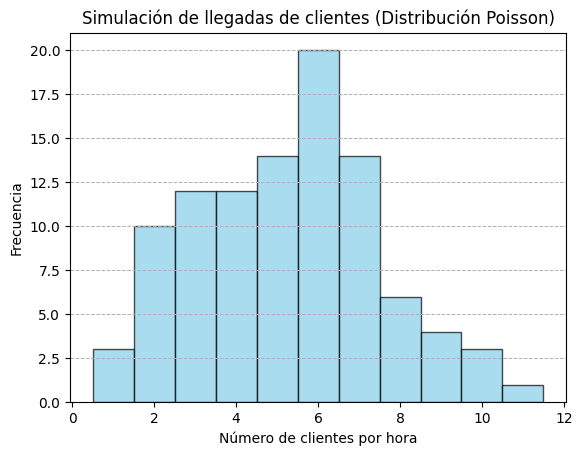

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

lambda_poisson = 5

num_simulaciones = 100
U = np.random.uniform(0, 1, num_simulaciones)

def poisson_pmf(lambda_poisson, k):
    return (lambda_poisson ** k) * math.exp(-lambda_poisson) / math.factorial(k)

def poisson_inverse_transform(lambda_poisson, U):
    F_k = 0
    k = 0
    while True:
        F_k += poisson_pmf(lambda_poisson, k)
        if U <= F_k:
            return k
        k += 1

llegadas_simuladas = [poisson_inverse_transform(lambda_poisson, u) for u in U]

print("Número de clientes que llegaron en cada simulación (hora):")
print(llegadas_simuladas)

plt.hist(llegadas_simuladas, bins=np.arange(min(llegadas_simuladas), max(llegadas_simuladas) + 1) - 0.5, edgecolor='black', color='skyblue', alpha=0.7)
plt.title("Simulación de llegadas de clientes (Distribución Poisson)")
plt.xlabel("Número de clientes por hora")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


#Conclusión

Este método nos permite anticipar la cantidad de clientes que utilizan el cajero automático, mejorando la gestión del servicio. Además, ofrece una base para ajustar la planificación según las necesidades observadas, optimizando los recursos y mejorando la experiencia del cliente. La combinación de estas técnicas es una herramienta poderosa para cualquier aplicación que requiera gestionar eventos discretos y frecuentes de manera eficiente y precisa.